# Importing Classical Libraries

In [1]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import seaborn as sns
import numpy as np
import pylatexenc

# Importing Quantum Computing Libraries

In [2]:
from qiskit.circuit.library import TwoLocal, ZZFeatureMap
from qiskit_algorithms.optimizers import COBYLA
from qiskit_machine_learning.algorithms import VQC, QSVC
from qiskit.primitives import Sampler
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel


In [3]:
import pandas as pd

## Loading Dataset using pandas library

In [4]:
df=pd.read_csv('taiwan_data.csv')

## Label Encoding
### What is Label Encoding?
Label encoding converts categorical values into numerical values, allowing machine learning models to process them.


In [5]:
# Create a LabelEncoder object
le = LabelEncoder()

# Apply label encoding to categorical columns
for col in df.select_dtypes(include=['object']).columns:
  df[col] = le.fit_transform(df[col])

# Display the updated DataFrame
df.head(5)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490


# Scaling The Dataset

In [6]:
# Create a Standard Scalar object
scalar = StandardScaler()

# Scale non-target columns
for col in df.columns:
    if col != 'Bankrupt?':
        df[col] = StandardScaler().fit_transform(df[[col]])

# Splitting dataset into test and train groups

In [7]:
X=df.drop('Bankrupt?',axis=1)
y=df['Bankrupt?']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

# Classical Machine Learning Models Implementation

In [8]:
models = [

    SVC(),
    RandomForestClassifier(),
]

for model in models:
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"Model: {model.__class__.__name__}, Score: {score}")

Model: SVC, Score: 0.9659824046920821
Model: RandomForestClassifier, Score: 0.9683284457478006


# Plotting The Confusion Matrix

In [9]:
import matplotlib.pyplot as plt


models = [
    
    SVC(),
    RandomForestClassifier(),
]

for model in models:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)

  print(f"Model: {model.__class__.__name__}")
  print(f"  Accuracy: {accuracy:.4f}")
  print(f"  F1 Score: {f1:.4f}")
  print(f"  Precision: {precision:.4f}")
  print(f"  Recall: {recall:.4f}")
  print("-" * 20)



Model: SVC
  Accuracy: 0.9660
  F1 Score: 0.0333
  Precision: 1.0000
  Recall: 0.0169
--------------------
Model: RandomForestClassifier
  Accuracy: 0.9689
  F1 Score: 0.2933
  Precision: 0.6875
  Recall: 0.1864
--------------------


# Data Preparation For Quantum Processing

In [10]:
dfq=df.copy()

# Feature Reduction

# 1. Correlation Method

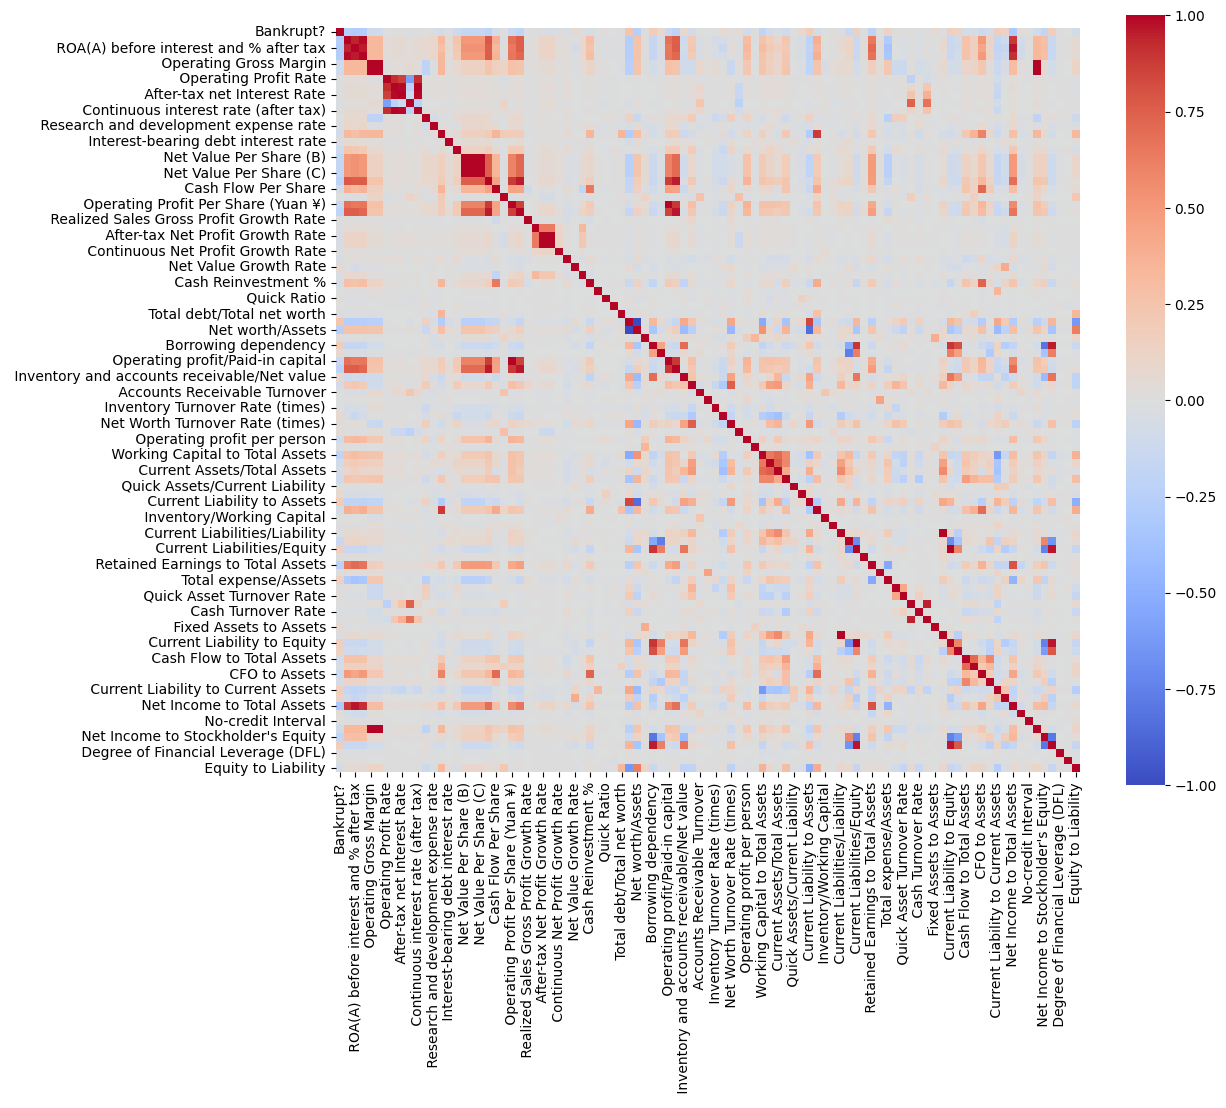

In [11]:
corr_matrix = dfq.corr()
# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', square=True)
plt.show()

# Calculate correlation with target


In [12]:
# Calculate correlation matrix
correlation_matrix = dfq.corr()

# Get correlations with target variable 'Bankrupt?'
target_correlations = correlation_matrix['Bankrupt?'].abs()

# Filter columns with correlation < 0.5
columns_to_drop = target_correlations[target_correlations < 0.2].index
columns_to_drop = columns_to_drop[columns_to_drop != 'Bankrupt?']  # exclude target variable

# Drop columns
dfq_filtered_corr = dfq.drop(columns=columns_to_drop)

print(f"Dropped columns: {list(columns_to_drop)}")
print(f"Remaining columns: {dfq_filtered_corr.columns}")

print(f"Number of remaining columns: {len(dfq_filtered_corr.columns)}")

Dropped columns: [' Operating Gross Margin', ' Realized Sales Gross Margin', ' Operating Profit Rate', ' Pre-tax net Interest Rate', ' After-tax net Interest Rate', ' Non-industry income and expenditure/revenue', ' Continuous interest rate (after tax)', ' Operating Expense Rate', ' Research and development expense rate', ' Cash flow rate', ' Interest-bearing debt interest rate', ' Tax rate (A)', ' Net Value Per Share (B)', ' Net Value Per Share (A)', ' Net Value Per Share (C)', ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)', ' Operating Profit Per Share (Yuan ¥)', ' Realized Sales Gross Profit Growth Rate', ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate', ' Regular Net Profit Growth Rate', ' Continuous Net Profit Growth Rate', ' Total Asset Growth Rate', ' Net Value Growth Rate', ' Total Asset Return Growth Rate Ratio', ' Cash Reinvestment %', ' Current Ratio', ' Quick Ratio', ' Interest Expense Ratio', ' Total debt/Total net worth', ' Long-term fund suitabi

In [13]:
dfq_filtered_corr

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Persistent EPS in the Last Four Seasons,Per Share Net profit before tax (Yuan ¥),Debt ratio %,Net worth/Assets,Net profit before tax/Paid-in capital,Retained Earnings to Total Assets,Net Income to Total Assets
0,1,-2.217909,-2.045798,-2.400361,-1.794106,-1.375150,1.750845,-1.750845,-1.460495,-1.232594,-2.254317
1,1,-0.673828,-0.311068,-0.598450,-0.597379,-0.435312,1.075727,-1.075727,-0.446793,-0.143474,-0.309033
2,1,-1.303672,-0.908420,-1.319910,-1.450153,-1.252562,1.749724,-1.749724,-1.126595,-0.971327,-0.820510
3,1,-1.735886,-1.636209,-1.556340,-1.055034,-1.077762,0.710131,-0.710131,-1.142029,-1.088734,-1.691222
4,1,-0.661778,-0.307745,-0.508050,-0.489361,-0.480715,-0.123674,0.123674,-0.495543,-0.816926,-0.316008
...,...,...,...,...,...,...,...,...,...,...,...
6814,0,-0.189395,-0.291959,-0.168181,-0.367130,-0.369478,0.212203,-0.212203,-0.376975,-0.356845,-0.194231
6815,0,-0.494676,-0.310237,-0.477627,-0.364287,-0.349046,-0.258249,0.258249,-0.354438,-0.082288,-0.198659
6816,0,-0.534845,-0.379194,-0.534996,-0.537684,-0.335426,-1.376904,1.376904,-0.338760,-0.106889,-0.247517
6817,0,0.017875,0.019594,0.007403,-0.014649,0.036878,-0.485905,0.485905,-0.007065,0.190903,0.100366


# 2.**Principal Component Analysis (PCA)**: 
### Select top k principal components explaining most of the variance.


In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)  # retain 95% of variance
dfq_filtered_pca = pca.fit_transform(dfq.drop(['Bankrupt?'], axis=1))

In [15]:
dfq_filtered_pca

array([[-7.33829438,  0.37329441, -0.30901366],
       [-2.70371311, -0.98634639, -2.15561702],
       [-4.30705861, -0.40470004, -0.30980105],
       ...,
       [ 1.91030785, -1.69378647, -1.40977816],
       [ 1.85426122, -0.39792285, -0.48864038],
       [ 1.23594199, -2.32944793, -0.46675743]])

In [16]:
dfq_filtered_pca.size

20457

In [17]:
# Convert array to DataFrame
dfq_filtered_pca = pd.DataFrame(dfq_filtered_pca)

In [18]:
# Add 'Bankrupt?' column
dfq_filtered_pca['Bankrupt?'] = dfq['Bankrupt?']


# Reducing Samples

# Sample Reduction of Correlation Based Data Set

In [19]:
from sklearn.utils import resample

# Define sample size
sample_size = 100

# Stratified sampling (maintaining class balance)
dfq_sampled_corr = pd.concat([resample(dfq_filtered_corr[dfq_filtered_corr['Bankrupt?'] == c], replace=False, n_samples=int(sample_size * len(dfq_filtered_corr[dfq_filtered_corr['Bankrupt?'] == c]) / len(dfq_filtered_corr))) for c in dfq_filtered_corr['Bankrupt?'].unique()])

In [20]:
dfq_sampled_corr

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Persistent EPS in the Last Four Seasons,Per Share Net profit before tax (Yuan ¥),Debt ratio %,Net worth/Assets,Net profit before tax/Paid-in capital,Retained Earnings to Total Assets,Net Income to Total Assets
1750,1,0.013858,0.190741,0.179510,0.093369,-0.024416,1.519264,-1.519264,-0.023968,0.051422,0.049159
2046,1,-0.076923,-0.096719,-0.076912,-0.358602,-0.412610,1.405436,-1.405436,-0.422541,-0.008131,-0.229474
4376,1,-1.940746,-1.737568,-1.994431,-1.958975,-1.647567,1.635335,-1.635335,-1.750544,-1.681182,-1.734680
749,0,0.133561,0.201542,0.278602,0.033675,-0.026686,-0.076012,0.076012,-0.040381,0.164715,0.209999
2833,0,0.864629,0.406751,0.795793,0.360571,0.243460,0.927694,-0.927694,0.285679,0.326616,0.369707
...,...,...,...,...,...,...,...,...,...,...,...
2679,0,0.439646,0.795570,0.568055,0.454377,0.377399,-0.390020,0.390020,0.430458,0.655765,0.762595
1400,0,0.919259,0.457431,0.688009,-0.176677,0.070930,-0.874490,0.874490,-0.157724,-0.122084,0.221428
6178,0,-1.266717,-0.179800,-1.284271,-0.873109,-0.355857,0.175756,-0.175756,-0.361787,-0.478611,-0.114017
6043,0,0.546494,0.391797,0.392471,0.334988,0.402370,0.500418,-0.500418,0.456425,0.251312,0.406873


# Sample Reduction of PCA Based Data Set

In [21]:

# Define sample size
sample_size = 100

# Stratified sampling (maintaining class balance)
dfq_sampled_pca = pd.concat([resample(dfq_filtered_pca[dfq_filtered_pca['Bankrupt?'] == c], replace=False, n_samples=int(sample_size * len(dfq_filtered_pca[dfq_filtered_pca['Bankrupt?'] == c]) / len(dfq_filtered_pca))) for c in dfq_filtered_pca['Bankrupt?'].unique()])

In [22]:
dfq_sampled_pca

,0,1,2,Bankrupt?
2392,-6.578863,-1.415412,1.155769,1
235,-7.296469,0.008824,0.118738,1
1359,-2.881607,1.100018,1.919647,1
5888,3.407295,3.466655,1.785992,0
702,-1.420032,0.417282,-0.398065,0
...,...,...,...,...
2088,-6.898251,3.361373,4.967345,0
6089,-2.214520,-0.099002,-0.137694,0
27,2.259613,-1.253560,-1.395355,0
4870,5.088541,0.889065,-0.248500,0


# Splitting of Data Sets into Test and Train Samples

In [23]:
# Training and Testing for Corr Based Data
X=dfq_sampled_corr.drop('Bankrupt?',axis=1)
y=dfq_sampled_corr['Bankrupt?']
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y, test_size=0.20, random_state=40)

# Training and Testing of PCA based Data
X_pca=dfq_sampled_pca.drop('Bankrupt?',axis=1)
y_pca=dfq_sampled_pca['Bankrupt?']
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_pca, y_pca, test_size=0.20, random_state=40)

# Feature Maps

# Featue Map For Corr Based Data

In [24]:
feature_dim = X_train_c.shape[1]

feature_map_c = ZZFeatureMap(feature_dimension=feature_dim, reps=2, entanglement="linear")

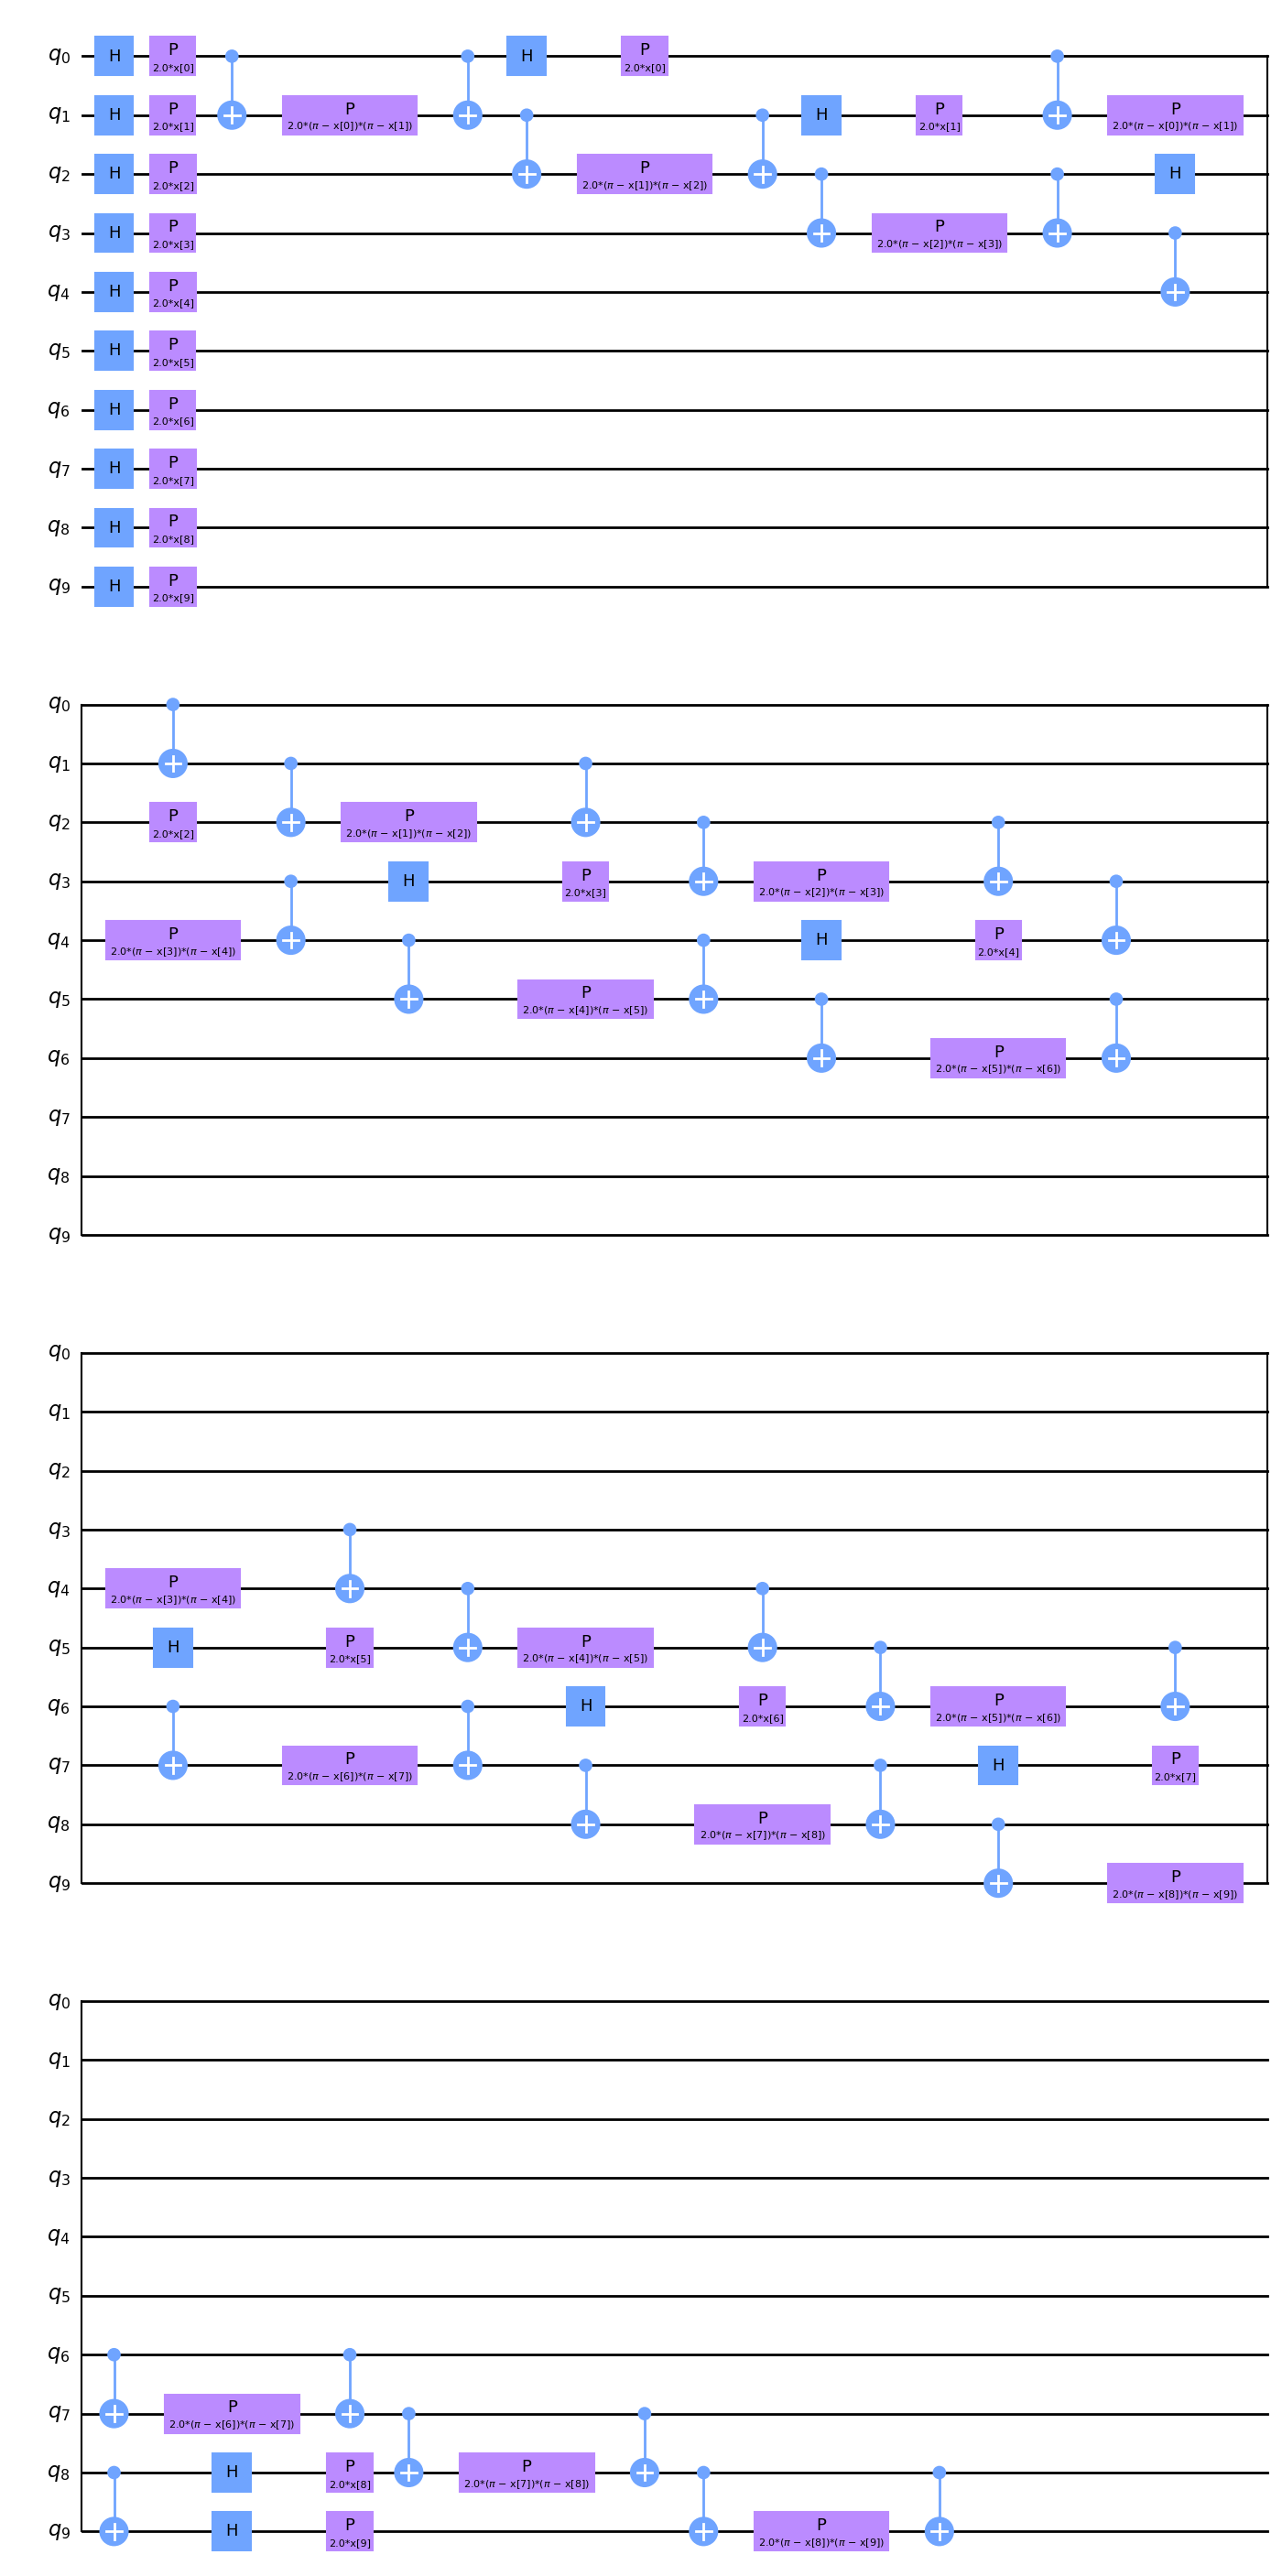

In [25]:
feature_map_c.decompose().draw(output="mpl", style="clifford", fold=20)

# Featue Map For PCA Based Data

In [26]:
feature_dim = X_train_p.shape[1]

feature_map_p = ZZFeatureMap(feature_dimension=feature_dim, reps=2, entanglement="linear")

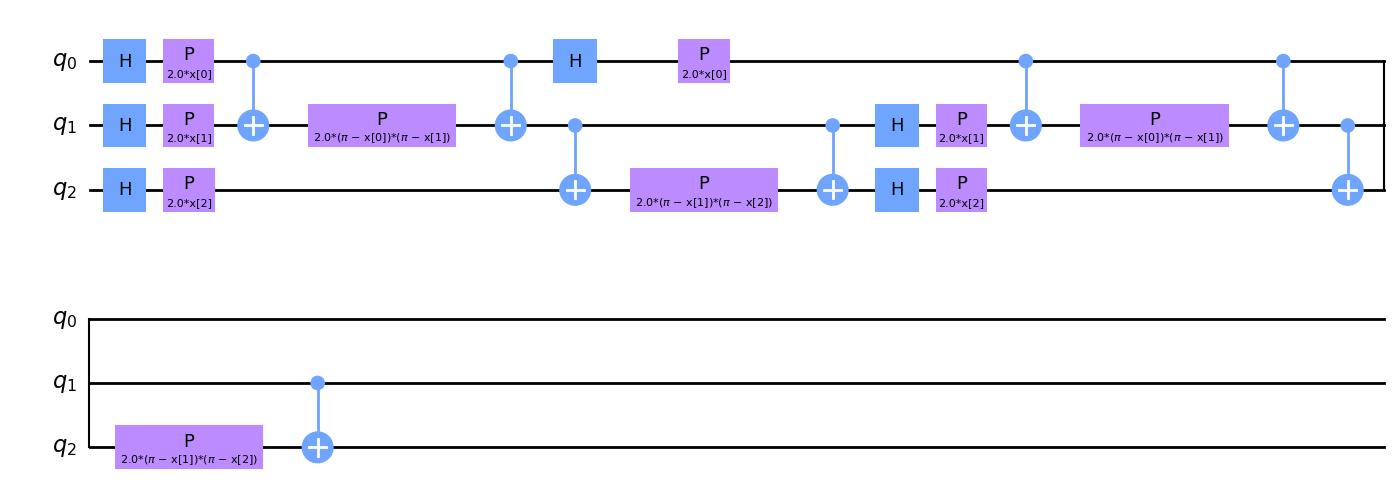

In [27]:
feature_map_p.decompose().draw(output="mpl", style="clifford", fold=20)

# Setting Up Quantum Kernel

In [28]:
from qiskit.primitives import Sampler
sampler=Sampler()

C:\Users\SURFACE\AppData\Local\Temp\ipykernel_4928\2810157668.py:2: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler=Sampler()


# Quantum Kernel (Correlation Based Data)

In [29]:
fidelity = ComputeUncompute(sampler=sampler)
q_kernel_corr = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map_c)

# Quantum Kernel (PCA Based Data)

In [30]:
q_kernel_pca = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map_p)

# QSVC on Corr Based and PCA Based Kernel

In [31]:
import time
qsvc = QSVC(
    quantum_kernel=q_kernel_corr
)
start = time.time()
qsvc.fit(X_train_c, y_train_c)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

qsvc_score = qsvc.score(X_test_c, y_test_c)

print(f"QSVC classification test score: {qsvc_score}")

Training time: 76 seconds
QSVC classification test score: 1.0


In [32]:
import time
qsvc_PCA = QSVC(
    quantum_kernel=q_kernel_pca
)
start = time.time()
qsvc.fit(X_train_p, y_train_p)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

qsvc_score = qsvc.score(X_test_p, y_test_p)

print(f"QSVC classification test score: {qsvc_score}")

Training time: 19 seconds
QSVC classification test score: 1.0


In [33]:
# Evaluate training matrix
matrix_train = q_kernel_pca.evaluate(X_train_p)

# Evaluate testing matrix
matrix_test = q_kernel_pca.evaluate(X_test_p, X_train_p)

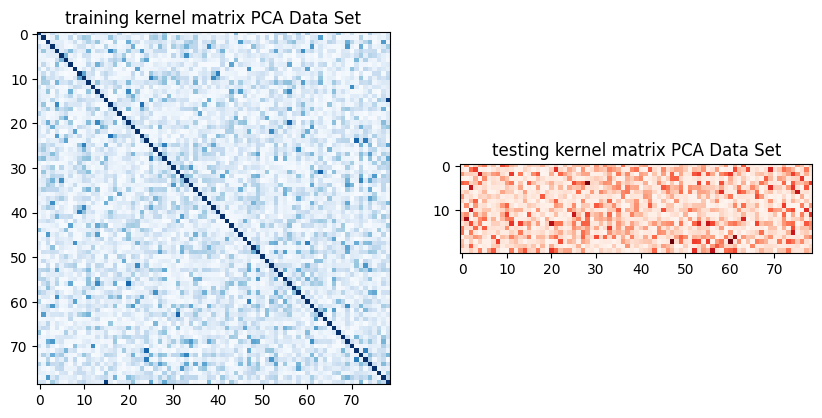

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(
    np.asmatrix(matrix_train), interpolation="nearest", origin="upper", cmap="Blues"
)
axs[0].set_title("training kernel matrix PCA Data Set")

axs[1].imshow(np.asmatrix(matrix_test), interpolation="nearest", origin="upper", cmap="Reds")
axs[1].set_title("testing kernel matrix PCA Data Set")

plt.show()